<a href="https://colab.research.google.com/github/TalCordova/TensorFlow_Course/blob/main/08_introduction_to_nlp_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NLP Fundamentals in TensorFlow

NLP has the goal of deriving information of natural language (could be sequence text or speech).

Another common term for NLP in sequence to sequence problem (seq2seq).

## Check for GPU

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-44b36f56-1095-46c2-d670-4b706552a827)


## Get helper functions

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for the notebooks
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2022-11-23 12:24:51--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-11-23 12:24:51 (81.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Get a text dataset

The dataset we're going to be using is Kaggle's introduction to NLP dataset (text samples of Tweets as disaster or not disaster).

See the original sources here: https://www.kaggle.com/c/nlp-getting-started

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# Unzip data
unzip_data("nlp_getting_started.zip")

--2022-11-23 12:24:57--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.01s   

2022-11-23 12:24:57 (50.3 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Visualizing a text dataset

To visuzlize our text samples, we first have to read them in, one way to do so would be to use Python: https://realpython.com/read-write-files-python/

But, I prefer to get visual right away.

So, another way to do this is to use pandas.

In [ ]:
# Create train and test datasets
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_df["text"][1]

'Forest fire near La Ronge Sask. Canada'

In [ ]:
# Shuffle train dataframe
train_df_shuffled = train_df.sample(frac = 1, random_state = 42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
# What does the test dataframe looks like
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# How many examples of each class are there?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# How many total samples?
len(train_df), len(test_df)

(7613, 3263)

In [ ]:
# Let's bisualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5) # Create indexes not higher than the total number of samples
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Traget: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Traget: 0 (not real disaster)
Text:
#OVOFest Drake straight body bagging Meek on that OVO stage. #ZIPHIMUP!

---

Traget: 0 (not real disaster)
Text:
Coastal German Shepherd Rescue OC shared a link... http://t.co/35QWnGLkOS #animalrescue | https://t.co/Is2iDC3UBJ

---

Traget: 1 (real disaster)
Text:
~ More wicked weather rolls through Calgary and surrounding areas http://t.co/SxwJyR3K3l http://t.co/aEWGlVqReH

---

Traget: 1 (real disaster)
Text:
Roof collapsed a bowling alley many in the community remember going to for more than 30 years @KEZI9 http://t.co/sAhbhLXsSh

---

Traget: 0 (not real disaster)
Text:
Somehow find you and I collide http://t.co/Ee8RpOahPk

---



### Split data into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation steps
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size = 0.1, # use 10% of training data for validation
                                                                            random_state = 42)

In [ ]:
# Check the lengths
len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

(6851, 762, 6851, 762)

In [ ]:
# Check the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

## Converting text into numbers

When dealing with a text problem, one of the first things you'll have to do, is convert your text to numbers.

There are a few ways to do this, namely:
* Tokenization - direct mapping of token (a token could be a word or character) to number
* Embeddings - create a matrix of feature vector for each token (the size can be defined and this embedding can be learned) 

### Text vectorization (tokenization)

In [ ]:
train_sentences[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# use the defaalt text vectorization parameters
text_vectorizer = TextVectorization(max_tokens = 10000, # how many words are in the vocabulary (automatically add <OOV>)
                                    standardize = "lower_and_strip_punctuation", # lowering number of datapoints
                                    split = "whitespace", # split sequences on space
                                    ngrams = None,
                                    output_mode = "int", # how to map tokens to numbers
                                    output_sequence_length = None, # pads sequences to the longest sequence, so that all inputs are the same size
                                    pad_to_max_tokens = True)

In [ ]:
# Find the avergage number of tokens (words) in the training tweetes
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
# Setup text vectorization variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a tweet does a model see?)

text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_mode = "int",
                                    output_sequence_length = max_length)

In [ ]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [ ]:
# Create a sample sentence and tokenizer
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
 All of this energy      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  44,    6,   19, 2474,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [ ]:
# Get the uniqe words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() # get all of the unique words in our training data
top_5_words = words_in_vocab[:5] # get the most common words
bottom_5_words = words_in_vocab[-5:] # get the least common words
print(f"Number of wards vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")

Number of wards vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Creating an Embedding using an Embedding Layer

To make our embeddings, we're going to use TensorFlow's embedding layer:  https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

The parameters we care most about for our embedding layer:
* `input_dim` = the size of our vocabulary
* `output_dim` = the size of the output embedding vector, for example, a value of 100 would mean each token gets represented by a vector 100 long
* `input_length` = length of the sequence being passed to the embedding layer

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length, # set input shape
                             output_dim = 128,
                             input_length = max_length # how long is each input
                             )

embedding

In [ ]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
        \n\n Embedded version")

# Embeded the random sentence (turn it into dense vactors of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 Learning from the Legacy of a Catastrophic Eruption - The New Yorker http://t.co/y8YqPBE4t9        

 Embedded version


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.04804445,  0.04057449,  0.04834584, ..., -0.0498742 ,
          0.01841453, -0.02854182],
        [-0.02716261, -0.03141021, -0.04346904, ..., -0.04090277,
          0.01575438,  0.00753586],
        [-0.02298209, -0.02993982, -0.01662989, ...,  0.02017132,
          0.04006089, -0.00173696],
        ...,
        [ 0.02431449,  0.04809969,  0.01094563, ...,  0.03251027,
          0.04711537, -0.0068013 ],
        [ 0.02431449,  0.04809969,  0.01094563, ...,  0.03251027,
          0.04711537, -0.0068013 ],
        [ 0.02431449,  0.04809969,  0.01094563, ...,  0.03251027,
          0.04711537, -0.0068013 ]]], dtype=float32)>

In [ ]:
# Checkout a single token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.04804445,  0.04057449,  0.04834584, -0.01819675, -0.04195138,
         0.00763566,  0.04028429, -0.04755044,  0.00995149,  0.04680364,
        -0.03656098, -0.03746939,  0.01818575,  0.04509066, -0.01149794,
         0.02396456,  0.04546403, -0.01316155, -0.02949884, -0.04242637,
         0.00321478,  0.03968057,  0.01996059, -0.04056195, -0.03189124,
         0.00286437,  0.01706094, -0.03676989,  0.02600053, -0.01262578,
        -0.01506152,  0.01099194,  0.04472406,  0.03057319, -0.03163165,
        -0.00664041, -0.02622005,  0.00336711, -0.04957521,  0.0348789 ,
         0.0186452 , -0.01426119, -0.04435464, -0.04649434,  0.01238273,
        -0.01816591, -0.02136557,  0.02432458, -0.02891057, -0.03354237,
         0.01579703, -0.00075845,  0.00321815,  0.02287315,  0.01132907,
         0.03674015, -0.02428986,  0.04774615, -0.01635472,  0.02085548,
        -0.02058244,  0.02275953,  0.0315341 ,  0.04984789, -0.04204623,
  

## Modelling a text dataset (running a series of experiments)

Now we've got a way to turn our text sequnces into numbers, it's time to start building a series of modelling experiments.

We'll start with a baseline  and move on from threre.

* Model 0: Naive Bayes (baseline), this is from Sklearn ML map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model (RNN)
* Model 3: GRU model (RNN)
* Model 4: Biderctional-LSTM model (RNN)
* Model 5: 1D Concolutional Neural Network (CNN)
* Model 6: TensorFlow Hub Pretrained Feature Extractor (using transfer learning NLP).
* Model 7: Same as model 6 with 10% of the data

How are we going to approach all of these?

Use the standard steps in modelling with tensorflow
* Construct the model
* Train the model
* Make predictions with the model
* Track prediction evaluation metrics for later comparison

### Model 0: Getting a baseline

As with all machine learning modelling experiments, it's important to create a baseline model so you've got a benchmaek for future experiments to build upon.

To create our baseline we'll use sklearn's Multinomial Naive Bayes using TF-IDF formula to cinvert our words to numbers

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
    ("clf", MultinomialNB()) # model the text, clf => classifier
])

# Fit the pipline to training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of 79.27%


In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

### Creating an evaluation function for our model experiments

We could evaluate all of our model's predictions woth different metrics every time, however, this will be cumbersome and could be easily fixed with a function. 

Let's create one to compare our model's predictions with the truth labels using the following metrics:
* Accuracy
* Precision
* Recall
* F1-score

For a deep overview of many different evaluation methods, see the Sklearn documentation:https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
# Function to evaluate: accuracy, precision, recall, f-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification mosrl.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculating model precision, recall, and f1-score using "wighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average = "weighted")
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1": model_f1}
  return model_results

In [ ]:
# Get baseline results
baseline_results = calculate_results(y_true = val_labels,
                                     y_pred = baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 1: A simple dense model



In [ ]:
# Create a tensorboaord callback (need to create a new pne for each model)
from helper_functions import create_tensorboard_callback

# Create a directory to save tensorboard logs
save_dir = "model_logs"

In [ ]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape = (1,), dtype = tf.string) # inputs are 1-dimentional strings
x = text_vectorizer(inputs) # turn the unput tet to numbers
x = embedding(x) # create an embedding of the numberized input
x = layers.GlobalAveragePooling1D()(x) # condense the feature vector for each of token to one vector
outputs = layers.Dense(1, activation = "sigmoid") (x) # Create the output layer, want binary outputs so use sigmoid activation function
model_1 = tf.keras.Model(inputs, outputs, name = "model_1_dense")

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Compile the model
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fit the model
model_1_history = model_1.fit(x = train_sentences,
                              y = train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(dir_name = save_dir,
                                                                       experiment_name = "model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20221123-122503
Epoch 1/5
215/215 [==============================] - 6s 10ms/step - loss: 0.6118 - accuracy: 0.6926 - val_loss: 0.5369 - val_accuracy: 0.7572
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4410 - accuracy: 0.8199 - val_loss: 0.4766 - val_accuracy: 0.7887
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.3466 - accuracy: 0.8589 - val_loss: 0.4582 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.2844 - accuracy: 0.8930 - val_loss: 0.4678 - val_accuracy: 0.7874
Epoch 5/5
215/215 [==============================] - 1s 4ms/step - loss: 0.2379 - accuracy: 0.9120 - val_loss: 0.4861 - val_accuracy: 0.7900


In [ ]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 6ms/step - loss: 0.4861 - accuracy: 0.7900


[0.48610201478004456, 0.7900262475013733]

In [ ]:
# Make some predictions and evaluate those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 [==============================] - 0s 4ms/step


(762, 1)

In [ ]:
# Look at a single prediction
model_1_pred_probs[0]

array([0.2891397], dtype=float32)

In [ ]:
# Look at the first 10
model_1_pred_probs[:10]

array([[0.2891397 ],
       [0.81116277],
       [0.9979873 ],
       [0.09544522],
       [0.09765969],
       [0.9293186 ],
       [0.9053888 ],
       [0.99232155],
       [0.9632457 ],
       [0.24262884]], dtype=float32)

In [ ]:
# Convert model prediciton probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [ ]:
# Calculate our model 1 results
model_1_results = calculate_results(y_true = val_labels,
                                    y_pred = model_1_preds)
model_1_results

{'accuracy': 79.00262467191601,
 'precision': 0.7980691136385264,
 'recall': 0.7900262467191601,
 'f1': 0.7861489606524887}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [ ]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

## Visualizing learned embeddings

In [ ]:
# Get the vocabulary from the text vactorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
# Model 1 summay
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Get the weight matrix of embedding layer (these are the numerical representraion of each token in our training data, which were leraned for 5 epochs)
embed_weights = model_1.get_layer("embedding").get_weights()[0]
print(embed_weights.shape) # same size as vocab_size end embedding_dim (output dum of our embedding layer)

(10000, 128)


Now we,ve got the embeddings matrix our model has learned to represent out tokens, let's see how we can visualize it.

To do so, TensorFlow has a handy tool called projector: https://projector.tensorflow.org/

And TensorFlow also has an incredible guide on word embeddings themselves: https://www.tensorflow.org/text/guide/word_embeddings

In [ ]:
# Create embeddings file (we got this from TensorFlow's embeddings documentation)
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download files from colab to upload to projector
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Jay Alammar's visulized word2vec post: https://jalammar.github.io/illustrated-word2vec/

## Recurrent Neural Network (RNN's)

RNN's are useful for sequence data.

The premise of a recurrent neural network ia to use the representaion of a previous input to aid the representaion of later input.

If you want an overview of the internals of recurrent neural network, see the following: 
- MIT's sequence modelling lecture https://www.youtube.com/watch?v=7sB052Pz0sQ&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=1
- Chris Olah's intro to LSTMs https://colah.github.io/posts/2015-08-Understanding-LSTMs/
- Andrej Karpathy's unresonable effectiveness of recurrent neural networks: http://karpathy.github.io/2015/05/21/rnn-effectiveness/

### Model 2: LSTM

LSTM = long short term memory (one of the most popular RNN cells).

Our structure of an RNN typically looks like this:
```
Input (text) -> tokenize -> Embedding -> Layers (RNNs/dense) -> Output (label probability
```

In [ ]:
# Create an LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape = (1,), dtype = "string")
x = text_vectorizer(inputs)
x = embedding(x)
# print(x.shape)
# x = layers.LSTM(64, return_sequences = True)(x) # when you're stacking RNN cells together you need to set return_sequences = True
# print(x.shape)
x = layers.LSTM(64)(x)
# print(x.shape)
# x = layers.Dense(64, activation = "relu")(x)
# print(x.shape)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name = "model_2_LSTM")

In [ ]:
# Get a summay
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [ ]:
# Compile the model
model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fit the model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(save_dir,
                                                                       experiment_name = "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20221123-122529
Epoch 1/5
215/215 [==============================] - 8s 8ms/step - loss: 0.2297 - accuracy: 0.9221 - val_loss: 0.5860 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1584 - accuracy: 0.9409 - val_loss: 0.6016 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1260 - accuracy: 0.9529 - val_loss: 0.7178 - val_accuracy: 0.7835
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1038 - accuracy: 0.9593 - val_loss: 0.8119 - val_accuracy: 0.7835
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.0896 - accuracy: 0.9666 - val_loss: 0.9885 - val_accuracy: 0.7638


In [ ]:
# Make predictions with LSTM model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[1.7814356e-03],
       [8.6735809e-01],
       [9.9950838e-01],
       [4.9450874e-02],
       [6.5481575e-04],
       [9.9797159e-01],
       [9.1067743e-01],
       [9.9971706e-01],
       [9.9939764e-01],
       [5.9459490e-01]], dtype=float32)

In [ ]:
# Convert model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate model_2 results
model_2_results = calculate_results(y_true = val_labels,
                                    y_pred = model_2_preds)
model_2_results

{'accuracy': 76.37795275590551,
 'precision': 0.7669591618844255,
 'recall': 0.7637795275590551,
 'f1': 0.760774054689911}

### Model 3: GRU

Another popular and effective RNN is the GRU (Gated Recurrent Unit).

The GRU cell has similar features to a LSTM cell, but has less parameters.





In [ ]:
# Build an RNN using the GRU cell
from tensorflow.keras import layers
inputs = layers.Input(shape = (1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
# print(x.shape)
x = layers.GRU(64)(x)
# x = layers.GRU(64, return_sequences = True)(x) # if you stack recurrent layers on top of each other, you need return_sequences = true
# print(x.shape)
# x = layers.LSTM(42, return_sequences = True)(x)
# print(x.shape)
# x = layers.GRU(99)(x)
# print(x.shape)
# x = layers.Dense(64, activation = "relu")(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name = "model_3_GRU")

In [ ]:
# Get the summary
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [ ]:
model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = "accuracy")

In [ ]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(save_dir,
                                                                       "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20221123-122554
Epoch 1/5
215/215 [==============================] - 3s 8ms/step - loss: 0.1633 - accuracy: 0.9359 - val_loss: 0.6675 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0853 - accuracy: 0.9679 - val_loss: 0.8502 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0733 - accuracy: 0.9726 - val_loss: 0.7914 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0635 - accuracy: 0.9761 - val_loss: 0.9794 - val_accuracy: 0.7795
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0518 - accuracy: 0.9778 - val_loss: 1.1570 - val_accuracy: 0.7703


In [ ]:
# Make some precitions with outr GRU model
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[1.6685177e-03],
       [6.9304675e-01],
       [9.9972409e-01],
       [1.5079737e-01],
       [8.4899075e-05],
       [9.9938560e-01],
       [3.8654146e-01],
       [9.9987268e-01],
       [9.9976939e-01],
       [9.2971241e-01]], dtype=float32)

In [ ]:
# Convert model_3_pred_probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate model_3 results
model_3_results = calculate_results(y_true = val_labels,
                                    y_pred = model_3_preds)
model_3_results

{'accuracy': 77.03412073490814,
 'precision': 0.7713700595744248,
 'recall': 0.7703412073490814,
 'f1': 0.768571140634933}

### Model 4: Biderctional RNN

Normal RNNs go from left to right (just like you'd read an english sentence), however, a biderctional RNN go from right to left as well as left to right.

In [ ]:
# Build a biderctional RNN in TensorFlow
from tensorflow.keras import layers
inputs = layers.Input(shape = (1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences = True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name = "model_4_biderctional")

In [ ]:
# Get a summary
model_4.summary()

Model: "model_4_biderctional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,37

In [ ]:
model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fit the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(save_dir,
                                                                       "model_4_biderctional")])

Saving TensorBoard log files to: model_logs/model_4_biderctional/20221123-122604
Epoch 1/5
215/215 [==============================] - 6s 11ms/step - loss: 0.1004 - accuracy: 0.9718 - val_loss: 1.0831 - val_accuracy: 0.7677
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0498 - accuracy: 0.9778 - val_loss: 1.2936 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0446 - accuracy: 0.9801 - val_loss: 1.3408 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0418 - accuracy: 0.9815 - val_loss: 1.3944 - val_accuracy: 0.7585
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0387 - accuracy: 0.9818 - val_loss: 1.5319 - val_accuracy: 0.7677


In [ ]:
# Make predicitons with our bidirectional model
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 4ms/step


array([[4.5872697e-01],
       [8.6549968e-01],
       [9.9997973e-01],
       [1.4295791e-01],
       [7.1647055e-06],
       [9.9984491e-01],
       [8.1679189e-01],
       [9.9999142e-01],
       [9.9998319e-01],
       [9.7829765e-01]], dtype=float32)

In [ ]:
# Convert pred probs to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_4_results = calculate_results(y_true = val_labels,
                                    y_pred = model_4_preds)
model_4_results

{'accuracy': 76.77165354330708,
 'precision': 0.7696465472028295,
 'recall': 0.7677165354330708,
 'f1': 0.7654097439388935}

## Convolutional Neural Network for Text (and oyher types of 
sequences)

We've used CNNs for images, but images are typically 2D (height x width)... however, our text data is 1D.

Previously we've used Conv2D for our image data but now er're going to use Conv1D

The typical structure of a Cinv1D model for sequences (in our case, text):
```
Inputs (text) -> Tokenization -> Embedding -> Layer(s) (Typically Conv1D + Pooling) -> Outputs (class probabilites)
```

### Model:5 Conv1D

Difference between "valid" and "same" explanation: https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t#:~:text=To%20sum%20up%2C%20'valid',same'%20padding%20means%20using%20padding.

In [ ]:
# Test out oue enbedding layer, Conv1D layer and max pooling
from tensorflow.keras import layers
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sentence into embeddiny
conv_1d = layers.Conv1D(filters = 32,
                        kernel_size = 5, # this is also referered to ngram of 5 (looking at 5 words at a time)
                        strides = 1, # default
                        activation = "relu",
                        padding = "valid") # default = "valid", the output is smaller than input shape, "same" the output is the same shape as input
conv_1d_output = conv_1d(embedding_test) # pass test embeddings through conv1d lauer
max_pool = layers.GlobalMaxPooling1D()
max_pool_output = max_pool(conv_1d_output) # equivalent to "get the most important feature" or "get the feature with the highest value"

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [ ]:
# Create 1-dimensional convolutinal layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape = (1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters = 64, kernel_size = 5, activation = "relu", padding = "valid")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation = "relu")(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_5 = tf.keras.Model(inputs,outputs, name = "model_5_Conv1D")

# Compile Conv1D
model_5.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)              

In [ ]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(save_dir,
                                                                      "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20221123-122654
Epoch 1/5
215/215 [==============================] - 3s 6ms/step - loss: 0.1210 - accuracy: 0.9622 - val_loss: 0.9207 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0731 - accuracy: 0.9736 - val_loss: 1.0703 - val_accuracy: 0.7612
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0609 - accuracy: 0.9759 - val_loss: 1.2158 - val_accuracy: 0.7520
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0544 - accuracy: 0.9777 - val_loss: 1.1967 - val_accuracy: 0.7598
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0510 - accuracy: 0.9785 - val_loss: 1.2242 - val_accuracy: 0.7598


In [ ]:
# Make some predictions with Conv1D model
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[3.98822814e-01],
       [9.12697494e-01],
       [9.99944329e-01],
       [1.02099136e-01],
       [1.07162265e-07],
       [9.99084711e-01],
       [9.91551280e-01],
       [9.99951601e-01],
       [9.99999166e-01],
       [9.42538977e-01]], dtype=float32)

In [ ]:
# Convert model 5 pred probs to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Evaluate model 5 predicitons
model_5_results = calculate_results(y_true = val_labels,
                                    y_pred = model_5_preds)
model_5_results

{'accuracy': 75.98425196850394,
 'precision': 0.7594196255613578,
 'recall': 0.7598425196850394,
 'f1': 0.7593342459013136}

## Model 6: TensorFlow Hub Pretrained Sentence Encoder 

Now we,ve built a few of our own models, let's try and use transfer learning for NLP, specifically using TensorFlow Hub's Universal Sentence Encoder: https://tfhub.dev/google/universal-sentence-encoder/4

See how the USE was created here: https://arxiv.org/abs/1803.11175

In [ ]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,
                      "When you can the universal entence encoder on a sentence, it turns it into numbers"])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [ ]:
embed_samples[0].shape

TensorShape([512])

In [ ]:
# Create keras layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                       input_shape = [],
                                       dtype = tf.string,
                                       trainable = False,
                                       name = "USE")

In [ ]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation = "relu"),
    layers.Dense(1, activation = "sigmoid", name = "output_layer")],
    name = "model_6_USE")

# Compile
model_6.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Train a classifier on top of USE pre-trained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(save_dir,
                                                                       "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20221123-122726
Epoch 1/5
215/215 [==============================] - 5s 13ms/step - loss: 0.5010 - accuracy: 0.7889 - val_loss: 0.4567 - val_accuracy: 0.7900
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4152 - accuracy: 0.8156 - val_loss: 0.4366 - val_accuracy: 0.8097
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4002 - accuracy: 0.8228 - val_loss: 0.4378 - val_accuracy: 0.8084
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3928 - accuracy: 0.8253 - val_loss: 0.4344 - val_accuracy: 0.8123
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3863 - accuracy: 0.8285 - val_loss: 0.4255 - val_accuracy: 0.8176


In [ ]:
# Make some predictions with USE TF hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 9ms/step


array([[0.1729489 ],
       [0.7844621 ],
       [0.9870805 ],
       [0.21363924],
       [0.71575826],
       [0.7577807 ],
       [0.97949344],
       [0.9798433 ],
       [0.9478793 ],
       [0.10123336]], dtype=float32)

In [ ]:
# Convert prediciton probability
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model 6 preformance metrics
model_6_results = calculate_results(y_true = val_labels,
                                    y_pred = model_6_preds)
model_6_results

{'accuracy': 81.75853018372703,
 'precision': 0.8188543841314186,
 'recall': 0.8175853018372703,
 'f1': 0.8164548892316194}

In [ ]:
len(train_df)

7613

## Model 7: TF Hub Pretrained USE but with 10% of training data

Transfer learning really helps when you have a smaller dataset.

To see how our model performs on s smaller dataset, let's replicate `model_6` except we'll train it on 10% of the data.

**Note:** Making data splits like below, from the `train_df_shuffled` directly, leads to data leakage (where validation samples are in the training dataset). The trigger for this was when `model_7` outperformed `model_6` although it was trained on 10% of the data.

**DO NOT** make data splits which leak data from validation/test sets into training set, like in this code:
```
# Create subsets of 10% of the training data
train_10_percent = train_df_shuffled[["text", "target"]].sample(frac = 0.1, random_state = 42)
# train_10_percent.head(), len(train_10_percent)
train_sentences_10_percent = train_10_percent["text"].to_list()
train_labels_10_percent = train_10_percent["target"].to_list()
len(train_sentences_10_percent), len(train_labels_10_percent)
```

In [ ]:
# # Create subsets of 10% of the training data
# train_10_percent = train_df_shuffled[["text", "target"]].sample(frac = 0.1, random_state = 42)
# # train_10_percent.head(), len(train_10_percent)
# train_sentences_10_percent = train_10_percent["text"].to_list()
# train_labels_10_percent = train_10_percent["target"].to_list()
# len(train_sentences_10_percent), len(train_labels_10_percent)

In [ ]:
# Making a better dataset split (no data leakage)
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]
len(train_labels_10_percent)

685

In [ ]:
# Check the number of each in label in the updated training data subset
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [ ]:
# Check the number of targets in our subset of data
train_df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

To recreate a model the same as a previous model you've created you can use the `tf.keras.models.clone_model`. For more information see: https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model

In [ ]:
# Let's build a model same as model_6
#model_7 = tf.keras.models.clone_model(model_6)
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation = "relu"),
    layers.Dense(1, activation = "sigmoid", name = "output_layer")],
    name = "model_7_USE_10_percent")

# Compile model
model_7.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Get a summary (will be same as model_6)
model_7.summary()

Model: "model_7_USE_10_percent"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Fit the model to the data to the 10% training data subsets
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(save_dir,
                                                                       "tf_hub_encoder_10_percent_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_encoder_10_percent_correct_split/20221123-122749
Epoch 1/5
22/22 [==============================] - 2s 46ms/step - loss: 0.6708 - accuracy: 0.6934 - val_loss: 0.6481 - val_accuracy: 0.7493
Epoch 2/5
22/22 [==============================] - 1s 26ms/step - loss: 0.5988 - accuracy: 0.8190 - val_loss: 0.5877 - val_accuracy: 0.7717
Epoch 3/5
22/22 [==============================] - 1s 26ms/step - loss: 0.5230 - accuracy: 0.8190 - val_loss: 0.5353 - val_accuracy: 0.7690
Epoch 4/5
22/22 [==============================] - 1s 41ms/step - loss: 0.4619 - accuracy: 0.8248 - val_loss: 0.5054 - val_accuracy: 0.7769
Epoch 5/5
22/22 [==============================] - 0s 23ms/step - loss: 0.4215 - accuracy: 0.8350 - val_loss: 0.4911 - val_accuracy: 0.7717


In [ ]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 9ms/step


array([[0.19496274],
       [0.6148723 ],
       [0.9326731 ],
       [0.3328634 ],
       [0.5068509 ],
       [0.70197976],
       [0.90023226],
       [0.805936  ],
       [0.86231124],
       [0.16548146]], dtype=float32)

In [ ]:
# Turn pred probs into labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Evaluate model_7 predictions
model_7_results = calculate_results(y_true = val_labels,
                                    y_pred = model_7_preds)
model_7_results

{'accuracy': 77.16535433070865,
 'precision': 0.7728196127186888,
 'recall': 0.7716535433070866,
 'f1': 0.7698331286570831}

## Comparing the performance of each of our models

In [ ]:
# Combine model results into a DataFrame
import pandas as pd
all_model_results = pd.DataFrame({"0_baseline": baseline_results,
                                 "1_simple_dense": model_1_results,
                                 "2_lastm": model_2_results,
                                 "3_gru": model_3_results,
                                 "4_biderctional": model_4_results,
                                 "5_conv1d": model_5_results,
                                 "6_tf_hub_use_encoder": model_6_results,
                                 "7_tf_hub_use_10_percent": model_7_results})
all_model_results = all_model_results.transpose()

In [ ]:
# Reduce the accuracy to the same scale as the other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results

,accuracy,precision,recall,f1
0_baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.790026,0.798069,0.790026,0.786149
2_lastm,0.763780,0.766959,0.763780,0.760774
3_gru,0.770341,0.771370,0.770341,0.768571
4_biderctional,0.767717,0.769647,0.767717,0.765410
5_conv1d,0.759843,0.759420,0.759843,0.759334
6_tf_hub_use_encoder,0.817585,0.818854,0.817585,0.816455
7_tf_hub_use_10_percent,0.771654,0.772820,0.771654,0.769833


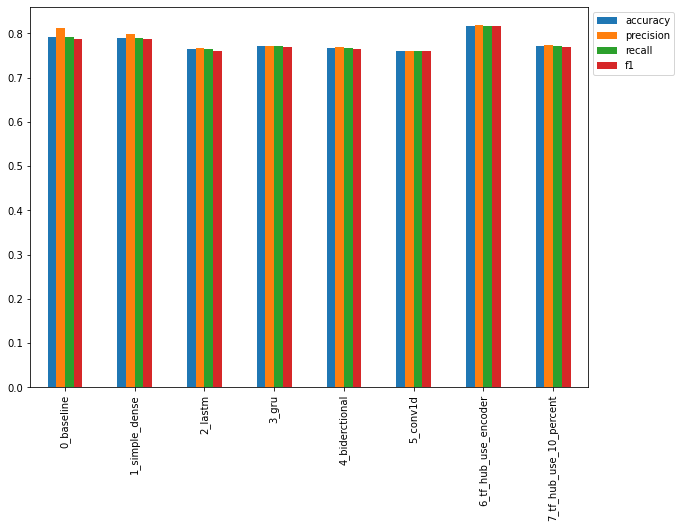

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind = "bar", figsize = (10,7)).legend(bbox_to_anchor = (1.0, 1.0));

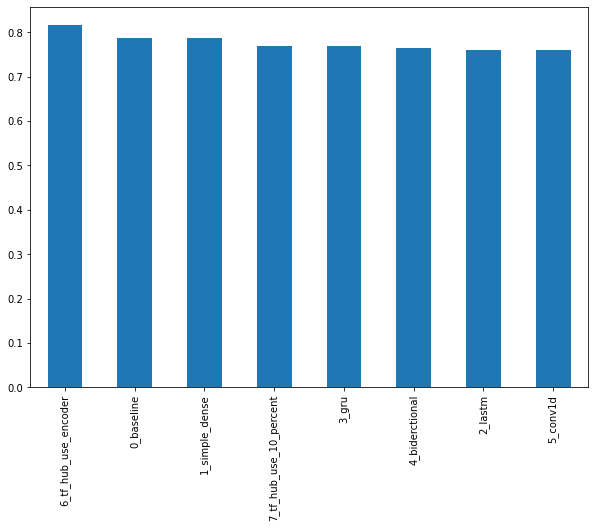

In [ ]:
# Sort model results bu f1-score
all_model_results.sort_values("f1", ascending = False)["f1"].plot(kind = "bar", figsize = (10,7))

## Uloading our model training logs to TensorBoard.dev
We can furher inspect our model's performance using tensorBoard.dev https://www.tensorflow.org/tensorboard 


In [ ]:
# View TensorBoard lofs of transfer learning modelling experiments (plus all of our other models)
# Upload TensorBoard dev record
!tensorboard dev upload --logdir ./model_logs/ \
    --name "NLP Modelling Experiments ZTM TF Course Video" \
    --description "Comparing multiple different types of architectures on the Kaggle Tweets text classification dataset" \
    --one_shot # exit the uploader once uploadin is finished


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=LYElu1RQEmoBXLnnYIkZFwNkTBAmEJ&prompt=consent&access_type=offline

Now, I've ran the cell above, my modelling experiments are visible on TensorBoard.dev: https://tensorboard.dev/experiment/HAb3ecbkT9GYnvNPbzrWdQ/

TensorBoard is great for quickly tracking experiments, but for larger scale experiments and whole bunch more tracking options, check out Weights & Biases: https://wandb.ai/site

In [ ]:
# If you need to delete an experiment from TensorBoard, run the following

# See your previous TensorBoard exeperiments
!tensorboard dev list

# Get the ID and run
# !tensorboard dev delete --experiment_id HAb3ecbkT9GYnvNPbzrWdQ

https://tensorboard.dev/experiment/D6GrKe8aQkOtjCaW21ZVBQ/
	Name                 NLP Modelling Experiments ZTM TF Course Video
	Description          Comparing multiple different types of architectures on the Kaggle Tweets text classification dataset
	Id                   D6GrKe8aQkOtjCaW21ZVBQ
	Created              2022-11-23 12:29:05 (11 seconds ago)
	Updated              2022-11-23 12:29:12 (just now)
	Runs                 14
	Tags                 5
	Scalars              210
	Tensor bytes         0
	Binary object bytes  2881739
https://tensorboard.dev/experiment/5A0caKp0QZOpXOjVZTWpgA/
	Name                 Transfer Learning Experiments with 10 Food101 Classes
	Description          We did a series of different transfer learning experiments with varying amounts of data and fine-tuning.
	Id                   5A0caKp0QZOpXOjVZTWpgA
	Created              2022-11-17 15:25:48
	Updated              2022-11-17 15:25:57
	Runs                 18
	Tags                 5
	Scalars              28

## Saving and loading a trained model

There are two main formats to save a model to in TensorFlow:
1. The HDF5 format
2. The `SavedModel` format (this is the default when using TensorFlow)

In [ ]:
# Save TF hub Sentence Encoder model to HDF5 format
model_6.save("model_6.h5")

In [ ]:
# Load model with custom Hub Layer (required with HDF5 format)
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                           custom_objects = {"KerasLayer": hub.KerasLayer})

In [ ]:
# How does our loaded model perform
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4255 - accuracy: 0.8176


[0.4255458116531372, 0.817585289478302]

Now, let's save to the `SavedModel` format

In [ ]:
# Save TF Hub Sentence Encoder model to SavedModel formt (default)
model_6.save("model_6_SavedModel_format")

In [ ]:
# Load in a model from the SavedModel format
Loded_model_6_SavedModel_format = tf.keras.models.load_model("model_6_SavedModel_format")

In [ ]:
# Evaluae model in saved model foramt
Loded_model_6_SavedModel_format.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4255 - accuracy: 0.8176


[0.4255458116531372, 0.817585289478302]

## Finding the most wrong examples

* If our best model still isn't perfect, what examples is it getting wrong?
* And of these wrong examples which ones is it getting *most* wrong (those will be prediction probabilities closest to the opposite class)

For example, if a sample should have a label of 0 but our model predicts a probability of 0.999 (really close to 1) and vice versa.

In [ ]:
# Download a pretrained model from Google Storage
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2022-11-23 12:29:44--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  51.8MB/s    in 18s     

2022-11-23 12:30:02 (50.7 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.i

In [ ]:
# Import previously trained model from Google Storage
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [ ]:
# Make rpedictions with the loaded model from GS
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10] # these shpuld be in label format

24/24 [==============================] - 0s 17ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Create DataFrame with validation sentences, validation labels and best performing model prediction labels + probabilities
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_pretrained_preds,
                       "pred_prob": tf.squeeze(model_6_predicted_pretrained_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [ ]:
# Find the wrong predicitons and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending = False)
most_wrong[:10] # these are false positives

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


In [ ]:
most_wrong.tail() # these are false negatives

,text,target,pred,pred_prob
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043918
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


Let's remind ourselves of the target labels...
* `0` = not disaster
* `1` = disaster

In [ ]:
# Check the false positives (model predicted 1 when shoul've been 0)
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0, Pred: 1.0, Prob: 0.9101957678794861
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

---

Target: 0, Pred: 1.0, Prob: 0.8769821524620056
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

---

Target: 0, Pred: 1.0, Prob: 0.8523000478744507
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

---

Target: 0, Pred: 1.0, Prob: 0.8354544043540955
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

---

Target: 0, Pred: 1.0, Prob: 0.8272132873535156
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

---

Target: 0, Pred: 1.0, Prob: 0.814815878868103
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

---

Targ

In [ ]:
# Check the false negatives (model predicted 0 when shoul've been 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 1, Pred: 0.0, Prob: 0.06730346381664276
Text:
@DavidVonderhaar At least you were sincere ??

---

Target: 1, Pred: 0.0, Prob: 0.05507582053542137
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

---

Target: 1, Pred: 0.0, Prob: 0.05460338667035103
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

---

Target: 1, Pred: 0.0, Prob: 0.054597001522779465
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

---

Target: 1, Pred: 0.0, Prob: 0.049637261778116226
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

---

Target: 1, Pred: 0.0, Prob: 0.043918490409851074
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

---

Target: 1, Pred: 0.0, Prob: 0.04208

## Makinng predictions on the test dataset

In [ ]:
# Making predictions on the test dataset and visualize them
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample])) # our model expects a list as input
  pred = tf.round(pred_prob)
  print(f"Pred:{int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("-----\n")

1/1 [==============================] - 0s 31ms/step
Pred:0, Prob: 0.14699918031692505
Text:
@youngthug Remind Me of Blood Sosa From Belly.....do your homework.

-----

1/1 [==============================] - 0s 30ms/step
Pred:0, Prob: 0.08549565821886063
Text:
@idkimnotfunny this quickly blew up and my mom doesn't get why it's so popular

-----

1/1 [==============================] - 0s 30ms/step
Pred:0, Prob: 0.3431883454322815
Text:
Politifiact: Harry Reid's '30 Percent of Women Served' Planned Parenthood Claim Is a 'Pants on Fire' Lie: Call... http://t.co/wY4Xu1A9j4

-----

1/1 [==============================] - 0s 28ms/step
Pred:0, Prob: 0.13319551944732666
Text:
SOMEBODY TELL ME HOW TO MEET PIERCE THE VEIL OR SLEEPING WITH SIRENS PLEASE I BEG YOU

-----

1/1 [==============================] - 0s 29ms/step
Pred:0, Prob: 0.43765732645988464
Text:
@Miss_Instiinctz or mostly around lava too

-----

1/1 [==============================] - 0s 29ms/step
Pred:1, Prob: 0.7151817083358765
Tex

## The speed/score tradeoff

In [ ]:
# Let's make a function to measure the time of prediction
import time
def pred_timer(model, samples):
  """
  Times how long a mode takes to make predictions on samples
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(samples)
  return total_time, time_per_pred

In [ ]:
# Calculate TF HUb Sentence Encoder time per pred
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model = model_6_pretrained,
                                                            samples = val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 0s 18ms/step


(0.7044195039998158, 0.0009244350446191808)

In [ ]:
# Calculate ouer base model times per pred
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.0163451419998637, 2.1450317585122964e-05)

In [ ]:
model_6_pretrained_results = calculate_results(y_true = val_labels,
                                               y_pred = model_6_pretrained_preds)
model_6_pretrained_results

{'accuracy': 81.62729658792651,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651,
 'f1': 0.8148082644367335}

Text(0, 0.5, 'F1-score')

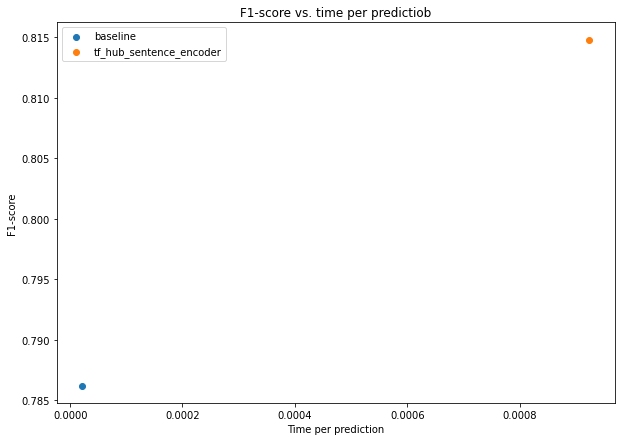

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label = "baseline")
plt.scatter(model_6_time_per_pred, model_6_pretrained_results["f1"], label = "tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score vs. time per predictiob")
plt.xlabel("Time per prediction")
plt.ylabel("F1-score")